In [1]:
import os
import pycocotools
from pycocotools import mask
import pycocotools.mask as mask_util
import numpy as np
import json
from pycocotools.coco import COCO
from sklearn.model_selection import train_test_split
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib as mpl

def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()

In [ ]:
os.getcwd()

os.chdir('../')

os.getcwd()

In [5]:
from src.data import SegmentationDataset

In [6]:
sd = SegmentationDataset(dataset_dir='datasets/train', 
                         csv_file_path='datasets/train.csv')

In [7]:
sd.processed_df.head()

,id,class,segmentation,case,day,slice,file_path,file_name,composite_id,image_height,image_width,resolution
0,case123_day20_slice_0065,stomach,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...,123,20,0065,datasets/train/case123/case123_day20/scans/sli...,slice_0065_266_266_1.50_1.50.png,123_20_slice_0065_266_266_1.50_1.50.png,266,266,266x266
1,case123_day20_slice_0066,stomach,27561 8 27825 11 28090 13 28355 14 28620 15 28...,123,20,0066,datasets/train/case123/case123_day20/scans/sli...,slice_0066_266_266_1.50_1.50.png,123_20_slice_0066_266_266_1.50_1.50.png,266,266,266x266
2,case123_day20_slice_0067,stomach,15323 4 15587 8 15852 10 16117 11 16383 12 166...,123,20,0067,datasets/train/case123/case123_day20/scans/sli...,slice_0067_266_266_1.50_1.50.png,123_20_slice_0067_266_266_1.50_1.50.png,266,266,266x266
3,case123_day20_slice_0068,stomach,14792 5 15056 9 15321 11 15587 11 15852 13 161...,123,20,0068,datasets/train/case123/case123_day20/scans/sli...,slice_0068_266_266_1.50_1.50.png,123_20_slice_0068_266_266_1.50_1.50.png,266,266,266x266
4,case123_day20_slice_0069,stomach,14526 6 14789 12 15054 14 15319 16 15584 17 15...,123,20,0069,datasets/train/case123/case123_day20/scans/sli...,slice_0069_266_266_1.50_1.50.png,123_20_slice_0069_266_266_1.50_1.50.png,266,266,266x266


In [8]:
df = sd.processed_df

In [9]:
random.seed(42)

# train - 65, val - 15, test - 20 

train_df, temp_df = train_test_split(df, test_size=0.35, random_state=42)
# Split the temporary dataset into validation and test sets
val_df, test_df = train_test_split(temp_df, test_size=0.5714, random_state=42)  # test_size ~ 57.14% of 35%


train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [10]:
train_df['class'].value_counts(normalize=True)

class
large_bowel    0.412603
small_bowel    0.330354
stomach        0.257043
Name: proportion, dtype: float64

In [11]:
val_df['class'].value_counts(normalize=True)

class
large_bowel    0.415176
small_bowel    0.330057
stomach        0.254767
Name: proportion, dtype: float64

In [12]:
test_df['class'].value_counts(normalize=True)

class
large_bowel    0.424296
small_bowel    0.330237
stomach        0.245467
Name: proportion, dtype: float64

### Testing the code for temporary dataframe with 20 samples

In [13]:
temp_df = train_df.sample(8)
temp_df = temp_df.reset_index(drop=True)

In [18]:
CLASSES = ['small_bowel', 'large_bowel', 'stomach']
categories = sd.create_coco_categories(CLASSES)
categories

[{'id': 0, 'name': 'small_bowel'},
 {'id': 1, 'name': 'large_bowel'},
 {'id': 2, 'name': 'stomach'}]

In [20]:
temp_images = sd.create_coco_images(temp_df)
temp_images[0]

Processing images: 100%|███████████████████████| 8/8 [00:00<00:00, 50686.45it/s]


{'id': 1,
 'file_name': 'case139/case139_day18/scans/slice_0046_266_266_1.50_1.50.png',
 'width': 266,
 'height': 266}

In [21]:
temp_annotations = sd.create_annotations(temp_df, temp_images)
temp_annotations[0]

Generating annotations: 100%|█████████████████████| 8/8 [00:00<00:00, 47.52it/s]


{'segmentation': {'counts': [40302,
   18,
   246,
   21,
   243,
   24,
   242,
   24,
   241,
   25,
   240,
   26,
   240,
   26,
   240,
   26,
   240,
   26,
   240,
   26,
   240,
   26,
   241,
   25,
   241,
   25,
   242,
   24,
   242,
   24,
   243,
   23,
   243,
   23,
   244,
   22,
   245,
   20,
   247,
   19,
   249,
   16,
   253,
   12,
   259,
   4,
   24588],
  'size': [266, 266]},
 'bbox': [151, 130, 23, 26],
 'area': 128775,
 'image_id': 1,
 'category_id': 2,
 'iscrowd': 0,
 'id': 0}

In [22]:
len(temp_annotations)

18

In [23]:
temp_json = {
    'categories': categories,
    'images': temp_images,
    'annotations': temp_annotations
}

with open('temp_json.json', 'w', encoding='utf-8') as f:
    json.dump(temp_json, f, ensure_ascii=True, indent=4, default=np_encoder)

In [24]:
from pathlib import Path
annFile = Path(f'temp_json.json')
coco = COCO(annFile)
imgIds = coco.getImgIds()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [26]:
temp_images

[{'id': 1,
  'file_name': 'case139/case139_day18/scans/slice_0046_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 2,
  'file_name': 'case123/case123_day22/scans/slice_0068_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 3,
  'file_name': 'case54/case54_day0/scans/slice_0081_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 4,
  'file_name': 'case77/case77_day0/scans/slice_0068_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 5,
  'file_name': 'case9/case9_day20/scans/slice_0099_360_310_1.50_1.50.png',
  'width': 360,
  'height': 310},
 {'id': 6,
  'file_name': 'case19/case19_day14/scans/slice_0107_360_310_1.50_1.50.png',
  'width': 360,
  'height': 310},
 {'id': 7,
  'file_name': 'case154/case154_day14/scans/slice_0082_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 8,
  'file_name': 'case136/case136_day27/scans/slice_0080_360_310_1.50_1.50.png',
  'width': 360,
  'height': 310}]

In [30]:
imgIds[5:7]

[6, 7]

In [36]:
imgs = coco.loadImgs(imgIds[5:7])
imgs

[{'id': 6,
  'file_name': 'case19/case19_day14/scans/slice_0107_360_310_1.50_1.50.png',
  'width': 360,
  'height': 310},
 {'id': 7,
  'file_name': 'case154/case154_day14/scans/slice_0082_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266}]

In [38]:
imgs[0]

{'id': 6,
 'file_name': 'case19/case19_day14/scans/slice_0107_360_310_1.50_1.50.png',
 'width': 360,
 'height': 310}

In [37]:
annIds = coco.getAnnIds(imgIds=[imgs[0]['id']])
annIds

[10, 11, 12, 13]

In [39]:
anns = coco.loadAnns(annIds[0])
anns

[{'segmentation': {'counts': [50033,
    4,
    305,
    6,
    303,
    8,
    301,
    9,
    301,
    9,
    300,
    10,
    300,
    10,
    299,
    11,
    298,
    11,
    297,
    13,
    296,
    14,
    296,
    14,
    295,
    14,
    295,
    15,
    295,
    15,
    294,
    16,
    294,
    16,
    294,
    16,
    295,
    14,
    296,
    14,
    296,
    14,
    296,
    14,
    296,
    14,
    296,
    14,
    296,
    14,
    296,
    14,
    296,
    15,
    296,
    14,
    296,
    15,
    296,
    15,
    295,
    16,
    294,
    17,
    294,
    16,
    294,
    17,
    294,
    17,
    293,
    18,
    293,
    18,
    292,
    19,
    292,
    19,
    292,
    18,
    293,
    18,
    293,
    18,
    293,
    17,
    293,
    18,
    293,
    17,
    294,
    16,
    295,
    15,
    296,
    14,
    297,
    13,
    298,
    12,
    299,
    11,
    300,
    10,
    301,
    9,
    301,
    9,
    301,
    9,
    302,
    8,
    302,
    8,
    303,
    

In [31]:
dataset_dir = '/Users/srikaranreddy/Desktop/Spring Semester/Computer Vision 6.8300/cv-project/gi-tract-image-segmentation/datasets/train'

In [45]:
i

[1, 2, 3, 4, 5, 6, 7, 8]

[6, 7]
6
[10, 11, 12, 13]
7
[14, 15, 16]


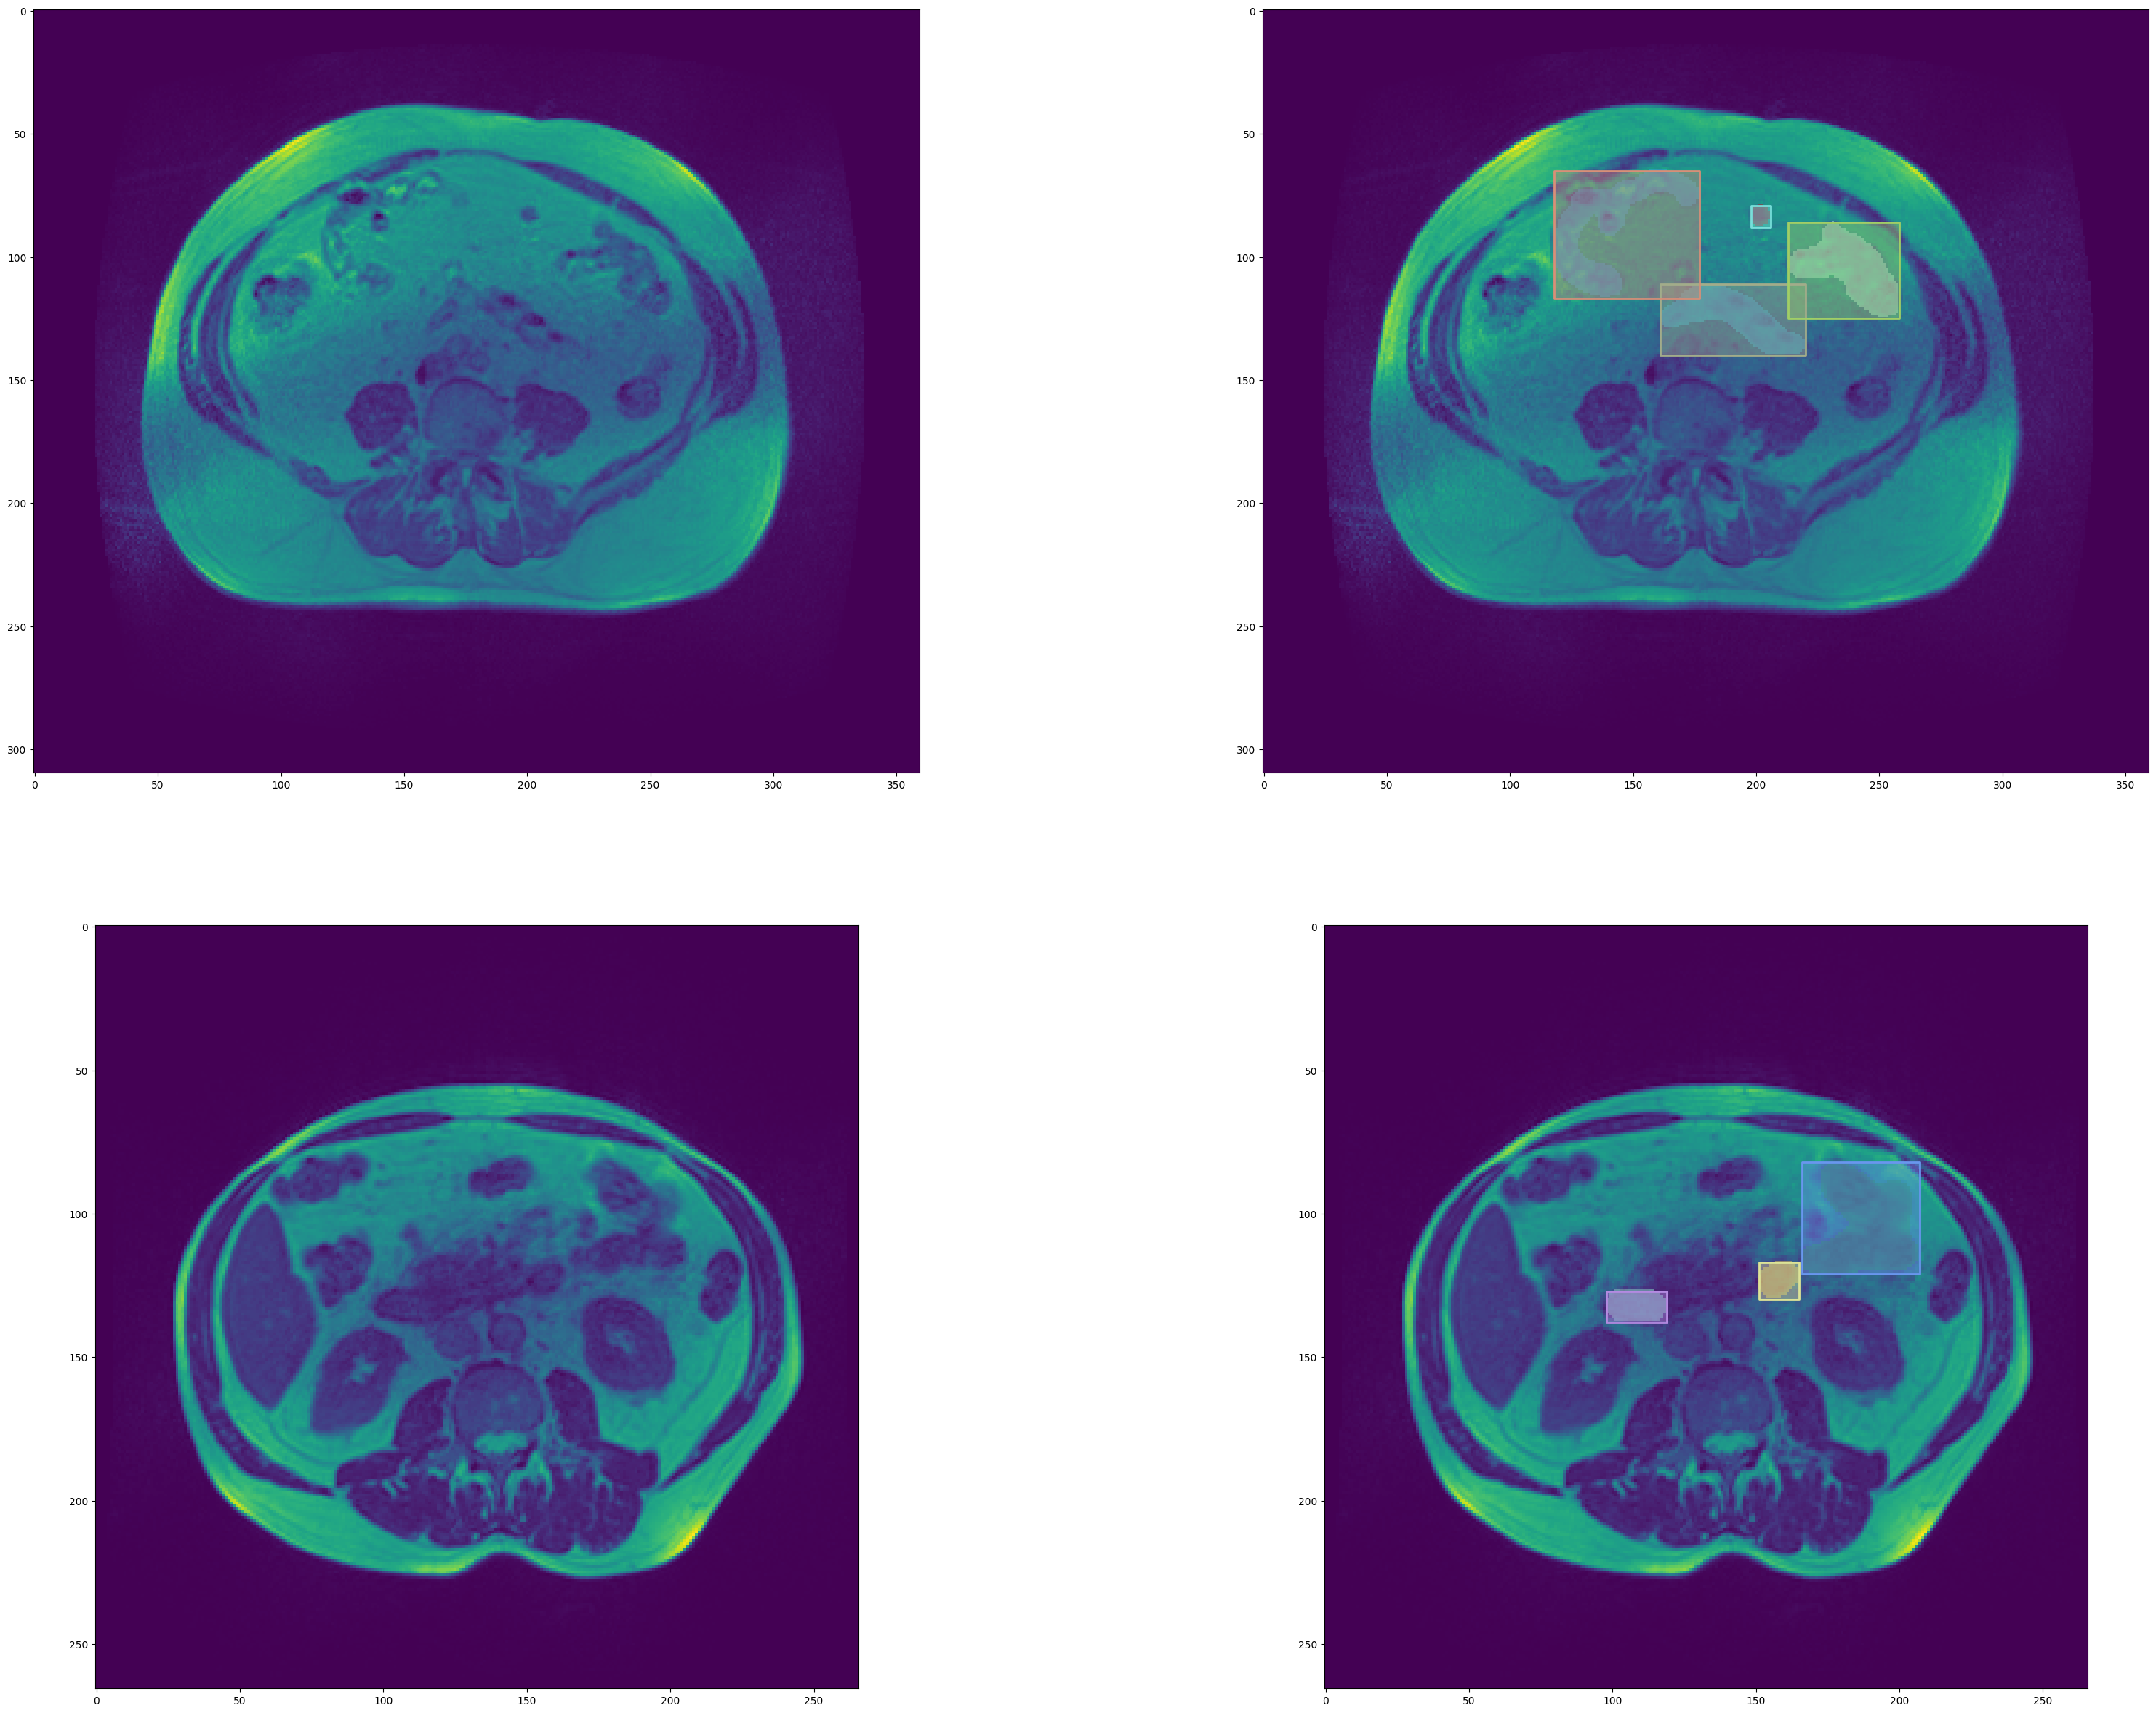

In [48]:
from matplotlib import pyplot as plt
from PIL import Image
imgs = coco.loadImgs(imgIds[5:7])
print(imgIds[5:7])
_, axs = plt.subplots(len(imgs), 2, figsize=(40, 15 * len(imgs)))
for img, ax in zip(imgs, axs):
    print(img['id'])
    I = Image.fromarray(
        np.array(Image.open(os.path.join(dataset_dir, img['file_name']))).astype("uint16"))
    annIds = coco.getAnnIds(imgIds=[img['id']])
    print(annIds)
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)

In [49]:
from src.data import DataGenerator

In [50]:
temp_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='temp_json.json',
                                     shuffle=True)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [66]:
X, y = temp_generator_class.__getitem__(1)

In [67]:
X.shape, y.shape

((128, 128, 3), (128, 128, 3))

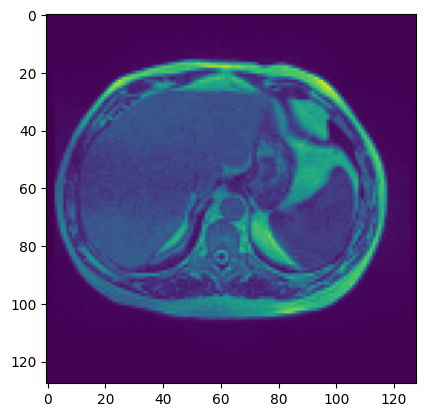

In [68]:
plt.imshow(X[:,:,0])

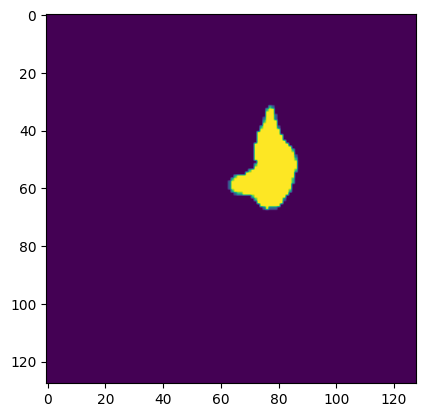

In [69]:
plt.imshow(y[:,:,2]/255.)

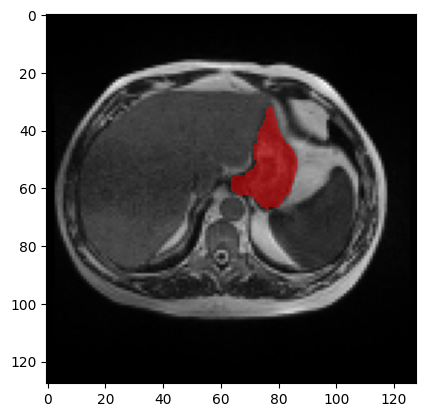

In [73]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['none', 'red'])  # 'none' is transparent, 'red' for the mask

fig, ax = plt.subplots()
# Display the image
ax.imshow((X/255.)[:,:,0], cmap='gray')  # Use gray scale for the background image
# Display the mask
# The mask is added with 'alpha' for transparency so the image can be seen under the mask
ax.imshow(y[:,:,2], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

plt.show()

In [74]:
from torch.utils.data import DataLoader

temp_loader = DataLoader(temp_generator_class, batch_size=32, num_workers=0)

In [75]:
print("Batch size:", temp_loader.batch_size)
print("Num workers:", temp_loader.num_workers)
print("Dataset size:", len(temp_loader.dataset))
print("Number of batches:", len(temp_loader))

Batch size: 32
Num workers: 0
Dataset size: 8
Number of batches: 1


In [28]:
for images, labels in temp_loader:
    # Execute your training or evaluation process
    print(images)
    pass

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         ...,

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000

### Testing successful, proceeding to a train and test dataframes

In [14]:
os.getcwd()

'/Users/srikaranreddy/Desktop/Spring Semester/Computer Vision 6.8300/cv-project/gi-tract-image-segmentation'

In [18]:
CLASSES = ['small_bowel', 'large_bowel', 'stomach']

In [ ]:
# !mkdir datasets/coco

In [30]:
# CLASSES = ['small_bowel', 'large_bowel', 'stomach']
# categories = sd.create_coco_categories(CLASSES)
# train_images = sd.create_coco_images(train_df)
# train_annotations = sd.create_annotations(train_df, train_images)

# train_json = {
#     'categories': categories,
#     'images': train_images,
#     'annotations': train_annotations
# }

# with open('datasets/coco/train_json.json', 'w', encoding='utf-8') as f:
#     json.dump(train_json, f, ensure_ascii=True, indent=4, default=np_encoder)
    
# print(train_annotations[0])

In [31]:
# CLASSES = ['small_bowel', 'large_bowel', 'stomach']
# categories = sd.create_coco_categories(CLASSES)
# val_images = sd.create_coco_images(val_df)
# val_annotations = sd.create_annotations(val_df, val_images)

# val_json = {
#     'categories': categories,
#     'images': val_images,
#     'annotations': val_annotations
# }

# with open('datasets/coco/val_json.json', 'w', encoding='utf-8') as f:
#     json.dump(val_json, f, ensure_ascii=True, indent=4, default=np_encoder)
    
# print(val_annotations[0])

In [32]:
# test_images = sd.create_coco_images(test_df)
# test_annotations = sd.create_annotations(test_df, test_images)
# test_json = {
#     'categories': categories,
#     'images': test_images,
#     'annotations': test_annotations
# }

# with open('datasets/coco/test_json.json', 'w', encoding='utf-8') as f:
#     json.dump(test_json, f, ensure_ascii=True, indent=4, default=np_encoder)

# print(test_annotations[0])

In [15]:
train_df.shape, val_df.shape, test_df.shape

((22043, 12), (5087, 12), (6783, 12))

In [16]:
from src.data import DataGenerator

In [19]:
train_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='datasets/coco/train_json.json',
                                     shuffle=True)

val_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='datasets/coco/val_json.json',
                                     shuffle=True)

test_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     subset="test",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='datasets/coco/test_json.json',
                                     shuffle=False)

loading annotations into memory...
Done (t=0.94s)
creating index...
index created!
loading annotations into memory...
Done (t=0.30s)
creating index...
index created!
loading annotations into memory...
Done (t=0.22s)
creating index...
index created!


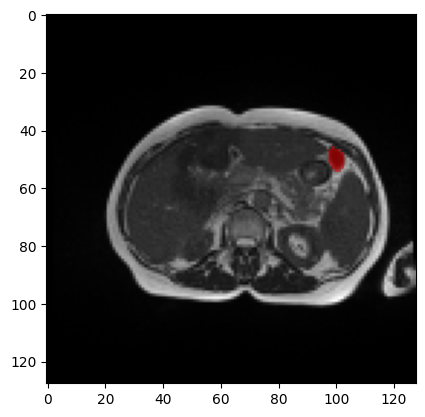

In [20]:
from matplotlib.colors import ListedColormap

X, y = train_generator_class.__getitem__(9)

cmap = ListedColormap(['none', 'red'])  # 'none' is transparent, 'red' for the mask

fig, ax = plt.subplots()
# Display the image
ax.imshow((X/255.)[:,:,0], cmap='gray')  # Use gray scale for the background image
# Display the mask
# The mask is added with 'alpha' for transparency so the image can be seen under the mask
ax.imshow(y[:,:,1], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

plt.show()

In [22]:
from torch.utils.data import DataLoader


train_loader = DataLoader(train_generator_class, batch_size=32, num_workers=0)
val_loader = DataLoader(val_generator_class, batch_size=32, num_workers=0)
test_loader = DataLoader(test_generator_class, batch_size=32, num_workers=0)

In [23]:
print("Batch size:", train_loader.batch_size)
print("Num workers:", train_loader.num_workers)
print("Dataset size:", len(train_loader.dataset))
print("Number of batches:", len(train_loader))

Batch size: 32
Num workers: 0
Dataset size: 14269
Number of batches: 446


In [24]:
print("Batch size:", val_loader.batch_size)
print("Num workers:", val_loader.num_workers)
print("Dataset size:", len(val_loader.dataset))
print("Number of batches:", len(val_loader))

Batch size: 32
Num workers: 0
Dataset size: 4620
Number of batches: 145


In [25]:
import segmentation_models_pytorch as smp

# Define model
model = smp.Unet(
    encoder_name="efficientnet-b7", 
    encoder_weights="imagenet", 
    in_channels=3, 
    classes=3,
    activation='sigmoid'
)

In [26]:
model

Unet(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          64, 16, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          16, 64, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Conv2dStaticSamePaddi

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Dice Loss
class DiceLoss(nn.Module):
    def __init__(self, smooth=1):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, y_pred, y_true):
        y_pred = y_pred.contiguous().view(-1)
        y_true = y_true.contiguous().view(-1)
        intersection = (y_pred * y_true).sum()
        dice = (2. * intersection + self.smooth) / (y_pred.sum() + y_true.sum() + self.smooth)
        return 1 - dice

# Combined BCE and Dice Loss
class BCEDiceLoss(nn.Module):
    def __init__(self, smooth=1):
        super(BCEDiceLoss, self).__init__()
        self.bce = nn.BCEWithLogitsLoss()
        self.dice = DiceLoss(smooth)

    def forward(self, y_pred, y_true):
        bce_loss = self.bce(y_pred, y_true)
        dice_loss = self.dice(y_pred, y_true)
        return 0.5 * bce_loss + 0.5 * dice_loss

def dice_coef_func(y_true, y_pred, smooth=1):
    y_true_f = y_true.contiguous().view(-1)
    y_pred_f = y_pred.contiguous().view(-1)
    intersection = torch.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (torch.sum(y_true_f) + torch.sum(y_pred_f) + smooth)


In [28]:
import torch
# from src.loss import BCEDiceLoss, dice_coef

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.2, patience=5, verbose=True, min_lr=0.001)
criterion = BCEDiceLoss()

In [30]:
from tqdm import tqdm
train_losses = []
val_losses = []
train_dice_coefs = []
val_dice_coefs = []
epochs = 5

class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


for epoch in range(epochs):
    model.train()
    train_loss = 0
    dice_coef = 0 

    dice_coef_meter = AverageMeter()
    batches = tqdm(enumerate(train_loader), total=len(train_loader))
    batches.set_description("Epoch NA: Loss (NA) Accuracy (NA %)")
    for batch_idx, (data, target) in batches:
        data = data.permute(0, 3, 1, 2)
        target = target.permute(0, 3, 1, 2)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        dice_coef = dice_coef_func(output, target)
        dice_coef_meter.update(dice_coef)
    
    train_losses.append(train_loss / len(train_loader))
    train_dice_coefs.append(dice_coef / len(train_loader))
    batches.set_description(
            "Epoch {:d}: Loss ({:.2e}), Train Accuracy ({:02.0f}%)".format(
                epoch, train_loss, 100.0 * dice_coef_meter.avg
            )
        )

    
    model.eval()
    
    with torch.no_grad():
        val_loss = 0
        for data, target in tqdm(val_loader):
            data = data.permute(0, 3, 1, 2)
            target = target.permute(0, 3, 1, 2)
            
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item()
            dice_coef += dice_coef_func(output, target)

    val_losses.append(val_loss / len(val_loader))
    val_dice_coefs.append(dice_coef / len(val_loader))

    print(f"Epoch {epoch}, Val Loss: {val_loss}")
    
    scheduler.step(val_loss)

    # Save model checkpoint
    torch.save(model.state_dict(), f'UNET_model_epoch_{epoch}.pth')


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 145/145 [07:17<00:00,  3.02s/it]


Epoch 0, Val Loss: 73.68037855934504


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 145/145 [05:23<00:00,  2.23s/it]


Epoch 1, Val Loss: 69.07294843998145


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 145/145 [05:22<00:00,  2.22s/it]


Epoch 2, Val Loss: 71.69046271825287


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 145/145 [11:06<00:00,  4.59s/it]


Epoch 3, Val Loss: 65.89961063765948


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 145/145 [05:36<00:00,  2.32s/it]


Epoch 4, Val Loss: 68.7432907515001


In [36]:
train_dice_coefs

[tensor(0.0017, dtype=torch.float64, grad_fn=<DivBackward0>),
 tensor(0.0018, dtype=torch.float64, grad_fn=<DivBackward0>),
 tensor(0.0018, dtype=torch.float64, grad_fn=<DivBackward0>),
 tensor(0.0018, dtype=torch.float64, grad_fn=<DivBackward0>),
 tensor(0.0019, dtype=torch.float64, grad_fn=<DivBackward0>)]

In [37]:
val_dice_coefs

[tensor(0.6791, dtype=torch.float64, grad_fn=<DivBackward0>),
 tensor(0.7426, dtype=torch.float64, grad_fn=<DivBackward0>),
 tensor(0.7071, dtype=torch.float64, grad_fn=<DivBackward0>),
 tensor(0.7864, dtype=torch.float64, grad_fn=<DivBackward0>),
 tensor(0.7476, dtype=torch.float64, grad_fn=<DivBackward0>)]

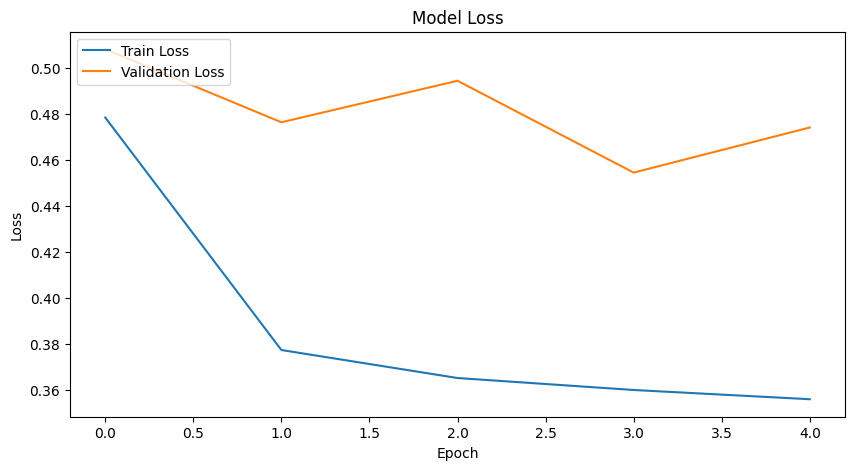

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# # Plot training and validation dice coefficient
# plt.figure(figsize=(10, 5))
# plt.plot(train_dice_coefs, label='Train Dice Coefficient')
# plt.plot(val_dice_coefs, label='Validation Dice Coefficient')
# plt.title('Model Dice Coefficient')
# plt.ylabel('Dice Coefficient')
# plt.xlabel('Epoch')
# plt.legend(loc='upper left')
# plt.show()

In [39]:
ls

LICENSE                 UNET_model_epoch_3.pth  requirements.txt
README.md               UNET_model_epoch_4.pth  src/
UNET_model_epoch_0.pth  config.py               temp_json.json
UNET_model_epoch_1.pth  datasets/
UNET_model_epoch_2.pth  notebooks/


In [41]:
os.getcwd()

'/Users/srikaranreddy/Desktop/Spring Semester/Computer Vision 6.8300/cv-project/gi-tract-image-segmentation'

In [45]:
model

Unet(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          64, 16, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          16, 64, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Conv2dStaticSamePaddi

In [51]:
test_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='datasets/coco/test_json.json',
                                     shuffle=False)
# img_s, mask_s = test_generator_class.__getitem__(87)
test_loader = DataLoader(test_generator_class, batch_size=32, num_workers=0)

loading annotations into memory...
Done (t=0.26s)
creating index...
index created!


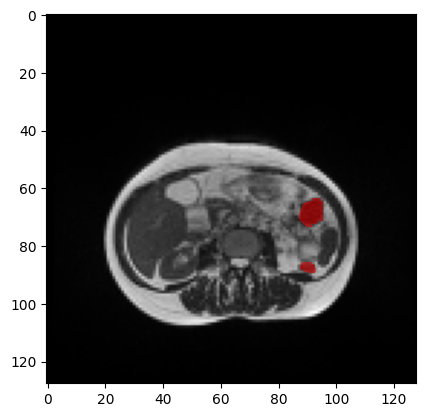

In [52]:
from matplotlib.colors import ListedColormap

X, y = test_generator_class.__getitem__(9)

cmap = ListedColormap(['none', 'red'])  # 'none' is transparent, 'red' for the mask

fig, ax = plt.subplots()
# Display the image
ax.imshow((X/255.)[:,:,0], cmap='gray')  # Use gray scale for the background image
# Display the mask
# The mask is added with 'alpha' for transparency so the image can be seen under the mask
ax.imshow(y[:,:,1], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

plt.show()

In [67]:
images_test = []
predictions = []
masks = []
# No need to track gradients here
with torch.no_grad():
    for data in test_loader:
        # Assuming your DataLoader returns a tuple of (images, labels)
        images = data[0]
        images = images.permute(0, 3, 1, 2)
        images_test.append(images)
        print(images.shape)
        # Generate predictions
        output = model(images).permute(0, 2, 3, 1)
        predictions.append(output)
        masks.append(data[1])

torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size

In [72]:
img_s = images_test[0].permute(0, 2, 3, 1)
pred_s = predictions[0]
mask_s = masks[0]

In [75]:
mask_s.shape

torch.Size([32, 128, 128, 3])

In [108]:
pred_s[0]

tensor(1.)

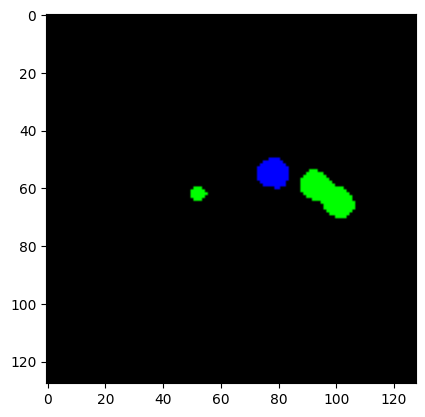

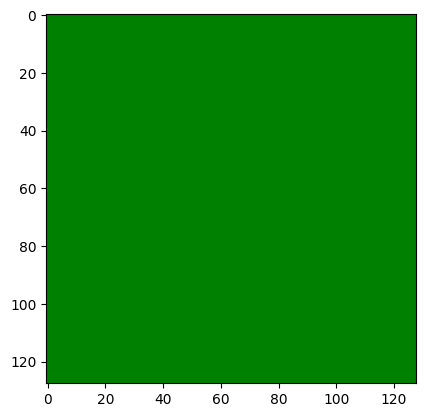

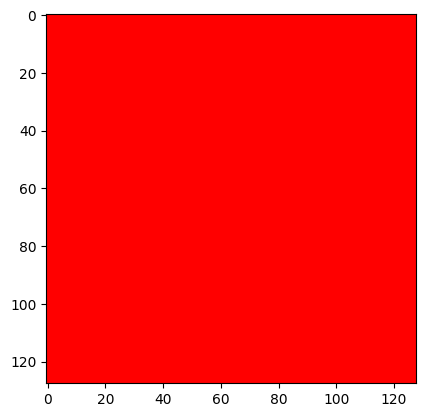

In [127]:
pre = pred_s[0]
predict1 = (pre > 0.8).float()
plt.imshow(predict1)
predict2=pre[:,:,1]
predict3=pre[:,:,2]    
plt.imshow(np.ma.masked_where(predict1== False,  predict1),cmap=cmap1, alpha=1)
plt.show()
plt.imshow(np.ma.masked_where(predict2== False,  predict2),cmap=cmap2, alpha=1)
plt.show()

plt.imshow(np.ma.masked_where(predict3== False,  predict3),cmap=cmap3, alpha=1) 
plt.show()


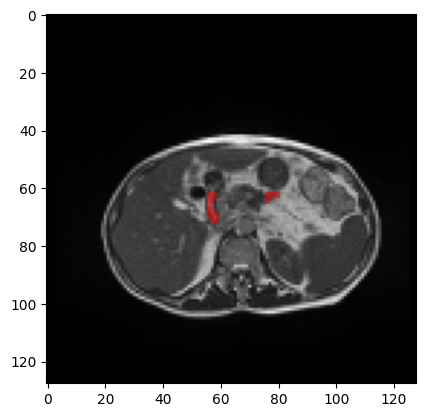

In [97]:
from matplotlib.colors import ListedColormap

X, y = img_s[0], mask_s[0]

cmap = ListedColormap(['none', 'red'])  # 'none' is transparent, 'red' for the mask

fig, ax = plt.subplots()
# Display the image
ax.imshow((X/255.)[:,:,0], cmap='gray')  # Use gray scale for the background image
# Display the mask
# The mask is added with 'alpha' for transparency so the image can be seen under the mask
ax.imshow(mask_s[0][:,:,0], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

# ax.imshow(pred_s[0][:,:,2], cmap=cmap, alpha=0.5)  # Adjust alpha for more or less transparency

plt.show()

In [117]:
img_s.shape, mask_s.shape, pred_s.shape

(torch.Size([32, 128, 3, 128]),
 torch.Size([32, 128, 128, 3]),
 torch.Size([32, 128, 128, 3]))

In [119]:
img_s = img_s.permute(0, 2, 3, 1)
img_s.shape

torch.Size([32, 128, 128, 3])

In [121]:
len(img_s)

32

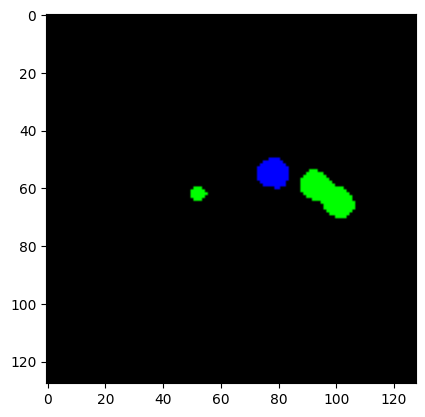

In [124]:
plt.imshow(np.ma.masked_where(predict1== False,  predict1),cmap=cmap1, alpha=1)

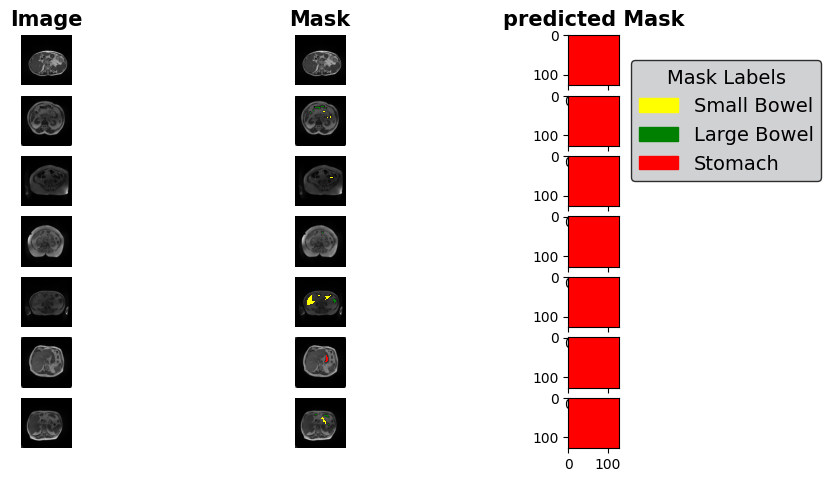

In [120]:
fig = plt.figure(figsize=(10, 25))

gs = gridspec.GridSpec(nrows=len(img_s), ncols=3)
colors = ['yellow','green','red']
labels = [ "Small Bowel","Large Bowel", "Stomach"]
patches = [ mpatches.Patch(color=colors[i], label=f"{labels[i]}") for i in range(len(labels))]

cmap1 = mpl.colors.ListedColormap(colors[0])
cmap2 = mpl.colors.ListedColormap(colors[1])
cmap3= mpl.colors.ListedColormap(colors[2])
flag=False
for i in range(0,7):
    images, mask = img_s[i], mask_s[i]
    sample_img=images/255.
    mask1=mask[:,:,0]
    mask2=mask[:,:,1]
    mask3=mask[:,:,2]

    pre = pred_s[i]
    predict1=pre[:,:,0]
    predict1 = (predict1 > 0.8).float()  # Convert boolean tensor to float32
    predict1 = predict1.numpy()
    # predict1= (predict1 > 0.8).astype(np.float32)
    # predict1 = np.array(predict1)
    predict2=pre[:,:,1]
    predict3=pre[:,:,2]    
    
    ax0 = fig.add_subplot(gs[i, 0])
    im = ax0.imshow(sample_img[:,:,0], cmap='gray')

    ax1 = fig.add_subplot(gs[i, 1])
    ax2 = fig.add_subplot(gs[i, 2])
    if(flag == False):
      flag= True
      ax0.set_title("Image", fontsize=15, weight='bold', y=1.02)
      ax1.set_title("Mask", fontsize=15, weight='bold', y=1.02)
      ax2.set_title("predicted Mask", fontsize=15, weight='bold', y=1.02)
      plt.legend(handles=patches, bbox_to_anchor=(1.1, 0.65), loc=2, borderaxespad=0.4,fontsize = 14,title='Mask Labels', title_fontsize=14, edgecolor="black",  facecolor='#c5c6c7')

    l0 = ax1.imshow(sample_img[:,:,0], cmap='gray')
    l1 = ax1.imshow(np.ma.masked_where(mask1== False,  mask1),cmap=cmap1, alpha=1)
    l2 = ax1.imshow(np.ma.masked_where(mask2== False,  mask2),cmap=cmap2, alpha=1)
    l3 = ax1.imshow(np.ma.masked_where(mask3== False,  mask3),cmap=cmap3, alpha=1)

    l0 = ax2.imshow(sample_img[:,:,0], cmap='gray')
    l1 = ax2.imshow(np.ma.masked_where(predict1== False,  predict1),cmap=cmap1, alpha=1)
    l2 = ax2.imshow(np.ma.masked_where(predict2== False,  predict2),cmap=cmap2, alpha=1)
    l3 = ax2.imshow(np.ma.masked_where(predict3== False,  predict3),cmap=cmap3, alpha=1)    
    _ = [ax.set_axis_off() for ax in [ax0,ax1]]

    colors = [im.cmap(im.norm(1)) for im in [l1,l2, l3]]


In [50]:
model.eval()

# Perform the prediction
with torch.no_grad():  # Turn off gradients to speed up this part
    preds = model(X)

RuntimeError: Wrong input shape height=128, width=3. Expected image height and width divisible by 32. Consider pad your images to shape (128, 32).

In [ ]:
img_s = torch.from_numpy(img_s).float()

# Add a batch dimension if not already present
if len(img_s.shape) == 3:
    img_s = img_s.unsqueeze(0)  # Add the batch dimension at the first position

# Assuming the model was trained on GPU, we need to send the input to the GPU
if torch.cuda.is_available():
    img_s = img_s.to('cuda')
    model.to('cuda')

# Ensure the model is in evaluation mode
model.eval()

# Perform the prediction
with torch.no_grad():  # Turn off gradients to speed up this part
    preds = model(img_s)

# Optionally, move predictions back to CPU for further processing
preds = preds.cpu()

# Convert predictions to numpy array if needed, or continue with torch tensors
preds_numpy = preds.numpy()

In [ ]:
img_s, mask_s = test_generator_class.__getitem__(87)
preds = model.predict(img_s)